In [42]:
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [43]:
dataframe = pd.read_csv("./train.csv")
test_dataframe = pd.read_csv("./test.csv")
passangerId = test_dataframe["PassengerId"]

In [44]:
final_dataframe= dataframe[['Survived', 'Pclass', 'Sex', 'SibSp',
       'Parch', 'Fare']]
final_dataframe = final_dataframe.dropna()
final_dataframe.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500


In [45]:
final_dataframe["Sex"] = final_dataframe["Sex"].replace(to_replace=final_dataframe["Sex"].unique(), value = [1 , 0])

In [46]:
final_dataframe = pd.get_dummies(final_dataframe, drop_first=True) 

In [47]:
final_dataframe

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,1,1,0,7.2500
1,1,1,0,1,0,71.2833
2,1,3,0,0,0,7.9250
3,1,1,0,1,0,53.1000
4,0,3,1,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000
887,1,1,0,0,0,30.0000
888,0,3,0,1,2,23.4500
889,1,1,1,0,0,30.0000


<Axes: >

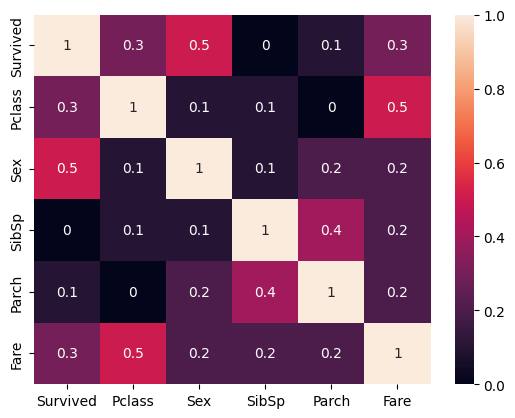

In [48]:
sns.heatmap(round(abs(final_dataframe.corr()), 1), annot=True)

In [49]:
train_y = final_dataframe["Survived"]
train_x = final_dataframe[['Pclass', 'Sex', 'SibSp',
       'Parch', 'Fare']]

In [50]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_target, val_target = train_test_split(train_x,train_y, train_size=0.8)

In [51]:
model = GaussianNB()
model.fit(train_data,train_target)
val_pred= model.predict(val_data)

In [52]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(val_target, val_pred)*100)+ "%")

Model accuracy score: 78.2123%
